In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [22]:
try:
    (train_data, test_data), ds_info = tfds.load(
        name="food101",
        with_info=True,
        as_supervised=True,
        shuffle_files=True,
        split=["train", "validation"]
    )
except Exception as e:
    print(f"Error: {e}")

In [23]:
class_name = ds_info.features["label"].names

In [24]:
saved_model_path = tf.keras.models.load_model("B2_model")
saved_model_path.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb2 (Functional  (None, None, None, 1408   7768569   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1408)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 101)               142309    
                                                                 
 dense_1 (Dense)             (None, 101)               10302     
                                                                 
 dense_2 (Dense)             (None, 101)               10302 

In [25]:
def preprocess_input_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.image.resize(img_array, [target_size[0], target_size[1]])
    img_array = tf.cast(img_array, tf.float64)
    img_array /= 255.0  # Normalize the image
    return img_array


In [26]:
input_image_path = '1.jpeg'
input_image = preprocess_input_image(input_image_path)
predictions = saved_model_path.predict(input_image)

1/1 [==============================] - 2s 2s/step


In [27]:
# Get the index of the predicted class
predicted_class_index = np.argmax(predictions[0])

In [28]:
# Get the name of the predicted class
predicted_class_name = class_name[predicted_class_index]

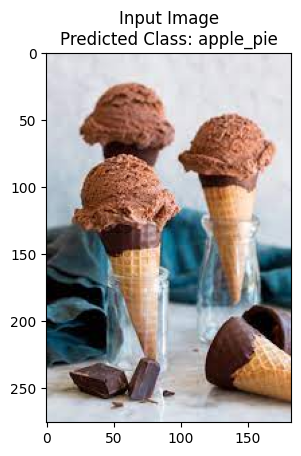

In [29]:
# Display the input image and predicted class
img = image.load_img(input_image_path)
plt.imshow(img)
plt.title(f"Input Image\nPredicted Class: {predicted_class_name}")
plt.show()